# EDA

## Date: Nov 7, 2023

---------------

## Introduction

In this notebook, we will explore the relationship between the borrowers financial characteristics and their loan outcome. We will look for any patterns between features, relying on visuals as an aid. This will also allow us to better understand our data and possible feature engineering steps to take when modeling.   

### Table of Contents

1. [Introduction](#Introduction)
   - [Table of Contents](#Table-of-Contents)
   - [Import Librarys](#Import-Librarys)
   - [Data Dictionary](#Data-Dictionary)
   - [Load the Data](#Load-the-Data)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

### Import Librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pathlib import Path

from helpers import data_dict

### Data Dictionary

In [2]:
data_dict()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Load the Data

In [3]:
# Define the relative path to the file
parquet_file_path = Path('../Data/Lending_club/eda_cleaned')

try:
    # Read the parquet file
    loans_df = pd.read_parquet(parquet_file_path)
except FileNotFoundError as e:
    print(e.args[1])
    print('Check file location')

In [4]:
loans_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
50867,23000.0,23000.0,23000.0,36,12.05,764.479980,3.0,RENT,50000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,331xx,FL,13.900000,0.0,Dec-2005,700.0,704.0,1.0,8.0,0.0,9976.0,45.599998,12.0,709.0,705.0,0.0,Individual,0.0,0.0,11973.0,21900.0,2.0,1710.0,11924.0,45.599998,0.0,0.0,110.0,119.0,5.0,5.0,0.0,5.0,2.0,4.0,4.0,4.0,6.0,5.0,5.0,7.0,4.0,8.0,0.0,1.0,81.800003,0.000000,0.0,0.0,28207.0,11973.0,21900.0,6307.0
373353,35000.0,35000.0,35000.0,60,17.57,880.609985,2.0,RENT,110000.0,Verified,Feb-2015,Fully Paid,debt_consolidation,774xx,TX,31.629999,0.0,May-1994,660.0,664.0,0.0,27.0,0.0,50450.0,75.599998,38.0,669.0,665.0,0.0,Individual,0.0,541.0,304808.0,66700.0,3.0,11289.0,9169.0,81.599998,0.0,0.0,138.0,193.0,11.0,3.0,1.0,47.0,0.0,7.0,10.0,8.0,13.0,17.0,14.0,19.0,10.0,27.0,0.0,3.0,91.900002,50.000000,0.0,0.0,336948.0,215616.0,49900.0,134250.0
185185,33100.0,33100.0,33100.0,36,13.99,1131.119995,1.0,MORTGAGE,72000.0,Source Verified,Aug-2015,Fully Paid,debt_consolidation,786xx,TX,12.130000,0.0,Dec-1994,750.0,754.0,2.0,10.0,0.0,16993.0,37.599998,29.0,704.0,700.0,0.0,Individual,0.0,89.0,33172.0,45200.0,3.0,3686.0,8802.0,64.800003,0.0,0.0,143.0,247.0,10.0,10.0,0.0,43.0,0.0,3.0,4.0,3.0,9.0,7.0,9.0,22.0,4.0,10.0,0.0,1.0,100.000000,33.299999,0.0,0.0,67371.0,33172.0,25000.0,22171.0
33164,1000.0,1000.0,1000.0,36,11.22,32.849998,10.0,RENT,40000.0,Verified,Dec-2015,Fully Paid,vacation,330xx,FL,18.270000,0.0,Dec-2004,695.0,699.0,1.0,9.0,0.0,12175.0,39.799999,13.0,514.0,510.0,0.0,Individual,0.0,0.0,25333.0,30600.0,5.0,2815.0,17325.0,41.299999,0.0,0.0,19.0,132.0,1.0,1.0,0.0,1.0,0.0,4.0,4.0,6.0,8.0,2.0,7.0,11.0,4.0,9.0,0.0,3.0,100.000000,16.700001,0.0,0.0,46125.0,25333.0,29500.0,15525.0
368586,4400.0,4400.0,4400.0,36,12.29,146.759995,3.0,RENT,34000.0,Verified,Feb-2015,Fully Paid,debt_consolidation,577xx,SD,8.860000,0.0,Oct-2000,690.0,694.0,0.0,6.0,0.0,10915.0,78.000000,17.0,674.0,670.0,0.0,Individual,0.0,0.0,10915.0,14000.0,0.0,2183.0,1985.0,84.599998,0.0,0.0,123.0,172.0,29.0,29.0,0.0,33.0,0.0,4.0,4.0,4.0,9.0,3.0,6.0,14.0,4.0,6.0,0.0,0.0,100.000000,100.000000,0.0,0.0,14000.0,10915.0,12900.0,0.0


## Exploratory Data Analysis

In [5]:
# Separate the data between fully paid and charged off / defaulted loans
paid_loans = loans_df[loans_df['loan_status'] == "Fully Paid"]
defaulted_loans = loans_df[loans_df['loan_status'] == "Charged Off/Default"]

***Loan Status Imbalance***

We will first explore the inbalance in our target variable ie failed and successful loans. This will become crucial when we start training the models. 

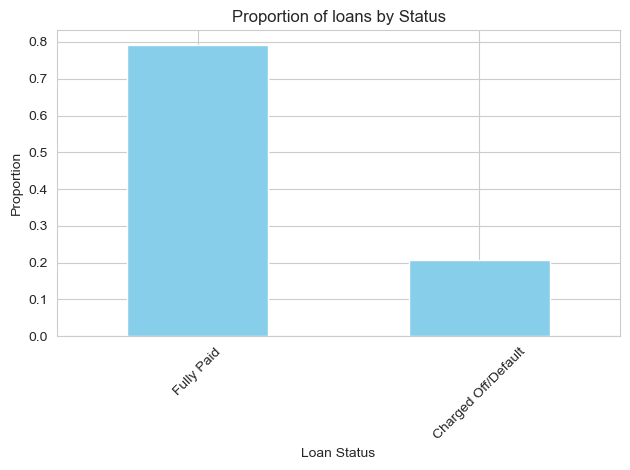

In [6]:
# Get the proportion of failed vs successful loans 
loan_status_counts = loans_df['loan_status'].value_counts(normalize=True)

# Place a background grid
sns.set_style("whitegrid")

# Plot the Proportions
loan_status_counts.plot(kind='bar', color='skyblue')
plt.title('Proportion of loans by Status')
plt.xticks(rotation=45) 
plt.xlabel('Loan Status')
plt.ylabel('Proportion')

# Show the plot
plt.tight_layout()
plt.show()

We can see that we have large difference between our categories. This will need to be taken into consideration when we start creating the models.

***Loan Amount***

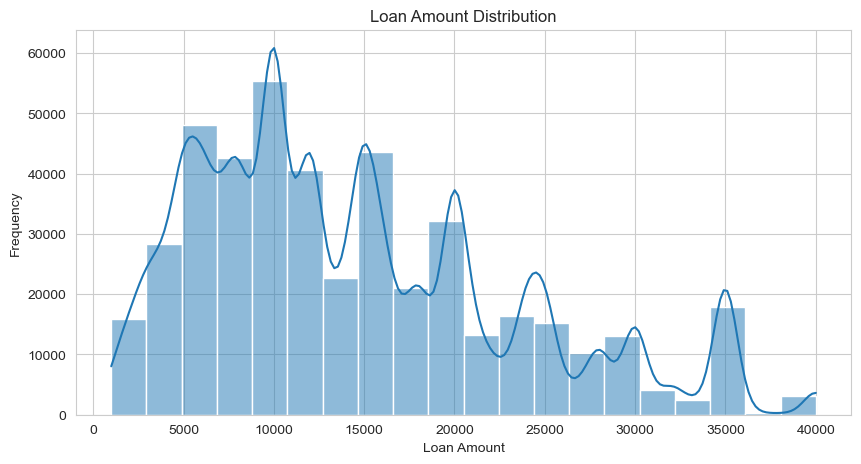

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(loans_df['loan_amnt'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

We can see that majority of loans center around  `$10,000`, with a right tail to `$40,000`, with the maximum coming in at `$40,000`.   
This is due to LC limiting the amount to just `$40,000`. This gives us a good idea of the range for Loan Amount, as well as how much investors typically risk on a loan. 
More Information can be found here:  
https://www.lendingclub.com/help/personal-loan-faq/how-much-can-i-borrow

***Debt to income vs Loan Status***

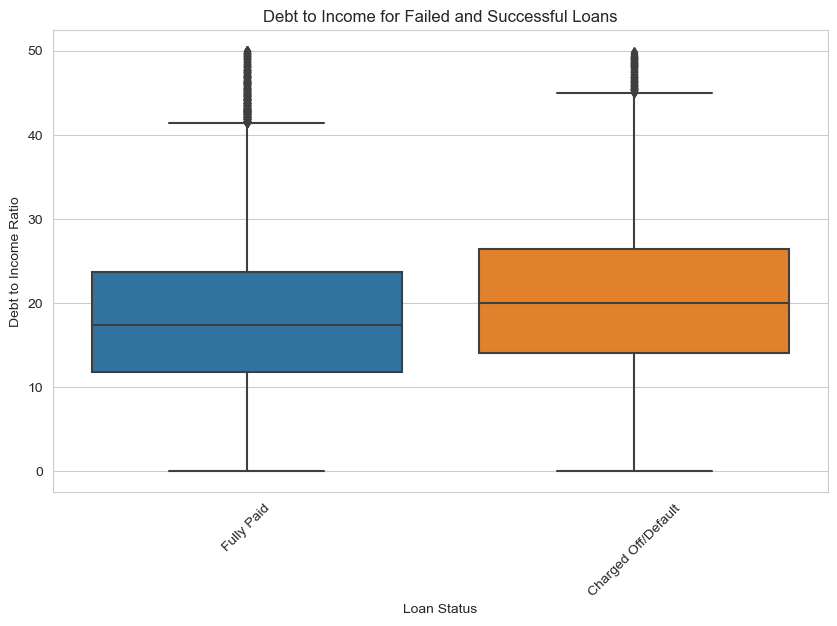

In [8]:
# DTI vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=loans_df)
plt.xticks(rotation=45)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.title('Debt to Income for Failed and Successful Loans')

plt.show()

Looking at the boxplot, we can see that the median Dti is lower for the successful loans, with a lower IQR. Borrowers that have a lower Dti ratio are more likely to repay their loans.

***Number of loans and interest rate overtime***

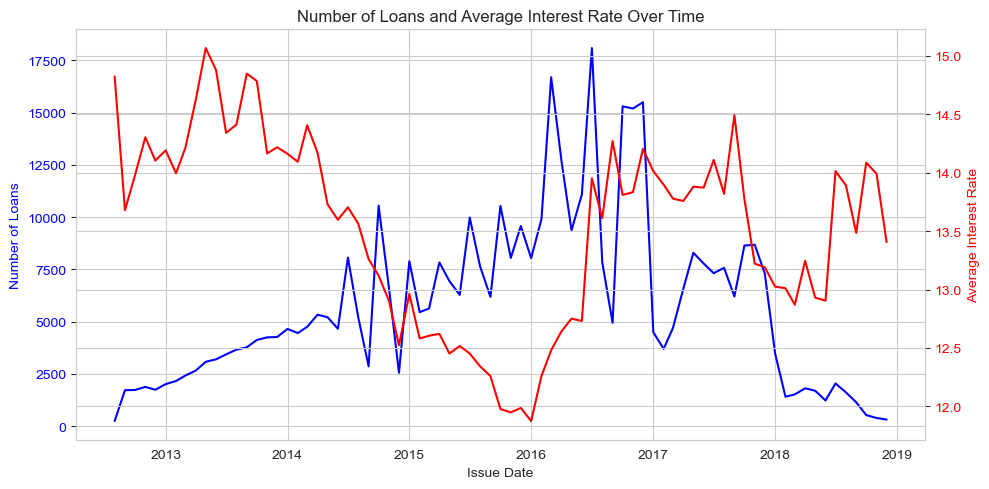

In [9]:
#Link used: https://stackoverflow.com/questions/22276066/how-to-plot-multiple-functions-on-the-same-figure

# Convert 'issue_d' to datetime
loans_df['issue_d'] = pd.to_datetime(loans_df['issue_d'], format='%b-%Y')

#group by issue date and count the number of loans
loans_count = loans_df.groupby(loans_df['issue_d']).size()

# calculate the average interest rate over the same period
average_interest_rate = loans_df.groupby(loans_df['issue_d'])['int_rate'].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))

# number of loans on the left y-axis
ax1.set_xlabel('Issue Date')
ax1.set_ylabel('Number of Loans', color='blue')
ax1.plot(loans_count.index, loans_count, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

#average interest rate on the right y-axis
ax2.set_ylabel('Average Interest Rate', color='red')
ax2.plot(average_interest_rate.index, average_interest_rate, color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Title and show
plt.title('Number of Loans and Average Interest Rate Over Time')
fig.tight_layout()
plt.show()

We can see that there is an inverse correlation between interest rate and number of loans. This shows that P2P loans are as sensitive to external economic factors as other loans, and that these factors must be considered along side any conclusions found in this project.

***Loan Amount and Loan Status Correlation***

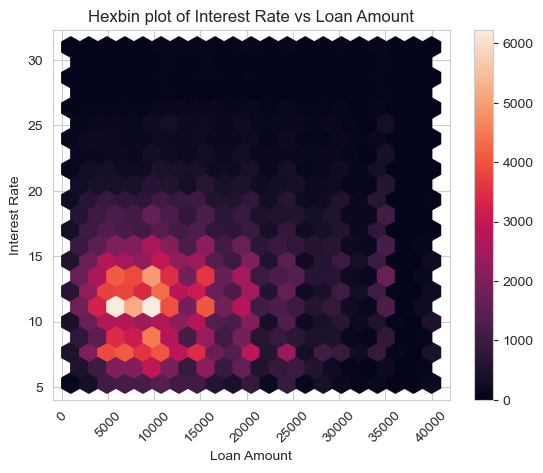

In [10]:
# A hexbin is more appropriate due to the number of datapoints being plotted. The count of each hex is plotted on the right
plt.hexbin(paid_loans['funded_amnt'], paid_loans['int_rate'], gridsize=20, label='Fully Paid')
plt.colorbar()
plt.xlabel('Loan Amount')
plt.xticks(rotation=45) 
plt.ylabel('Interest Rate')
plt.title('Hexbin plot of Interest Rate vs Loan Amount')
plt.show()

***Interest rate by loan Status***

Median interest rate for fully paid loans:  12.119999885559082
Median interest rate for Charged Off/Default loans:  15.050000190734863


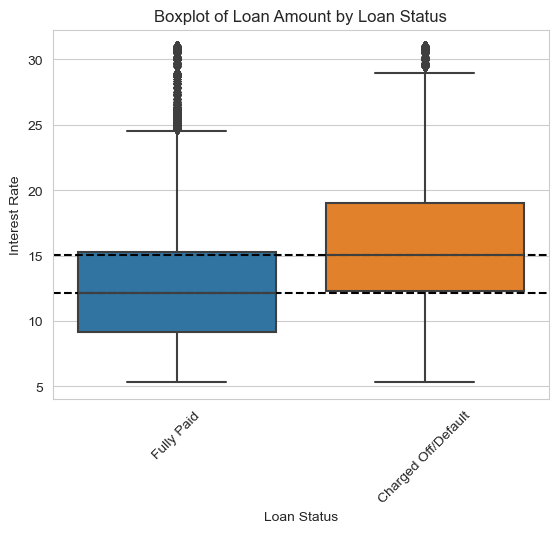

In [11]:
# Calculate medians
median_status_1 = loans_df.loc[loans_df['loan_status'] == 'Fully Paid', 'int_rate'].median()
median_status_0 = loans_df.loc[loans_df['loan_status'] == 'Charged Off/Default', 'int_rate'].median()

print('Median interest rate for fully paid loans: ', median_status_1)
print('Median interest rate for Charged Off/Default loans: ', median_status_0)

sns.boxplot(data=loans_df, x='loan_status', y='int_rate')
plt.xticks(rotation=45) 

plt.axhline(y=median_status_0, color='black', linestyle='--')
plt.axhline(y=median_status_1, color='black', linestyle='--')

plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

There is a difference between fully payed and defaulted / charged off loans. Charged off / defaulted loans have the a higher median interest rate, with fully paid loans having one of the lowest. When considered with the hexplot, the majority of loans fall between `$5,000` and `$10,000`, with an interest rate of approximately 12%, with the defaulted / charged off loans have a much higher interest rate, being further from the central grouping of data on the hex plot. 

***Loan purpose***

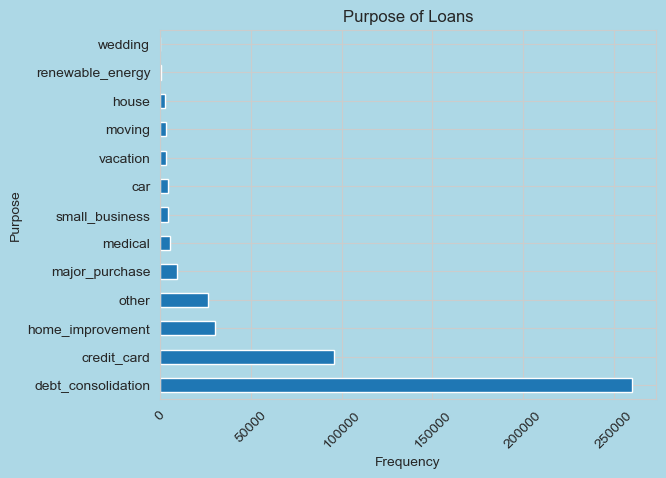

In [12]:
# Plot the data
loans_df['purpose'].value_counts().plot(kind='barh')

plt.title('Purpose of Loans')
plt.xlabel('Frequency')
plt.ylabel('Purpose')

# Rotate x-axis
plt.xticks(rotation=45)

# Retrieve the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Set the background color for the figure and the axes
fig.set_facecolor('lightblue')
ax.set_facecolor('lightblue') 

# Show the plot
plt.show()

We can see that the purpose for the majority of loans is debt and credit card consolidation. This makes sense since the interest rates for credit cards is usually over `20%` where as the interest rate for LC loans average `12%`.

***Annual Income vs Loan Amount***

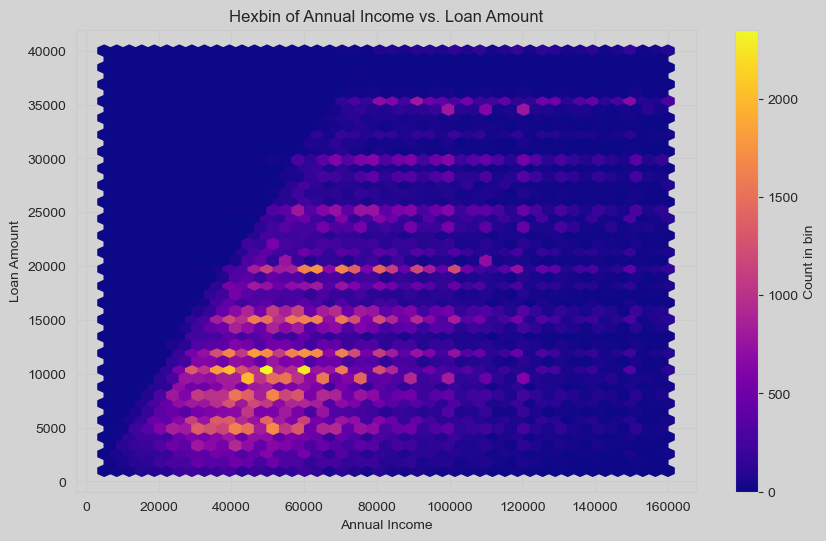

In [13]:
percentile_95 = loans_df['annual_inc'].quantile(0.95)
filtered_loans_df = loans_df[loans_df['annual_inc'] <= percentile_95]

# Create the hexbin plot
plt.figure(figsize=(10, 6))

# Retrieve the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Set the background color for the figure and the axes
fig.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')

plt.hexbin(filtered_loans_df['annual_inc'], filtered_loans_df['loan_amnt'], gridsize=45, cmap='plasma')
plt.colorbar(label='Count in bin')
plt.title('Hexbin of Annual Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

We can see an odd relationship / line in this graph. We will research this further. 

***Correlation Heatmap***

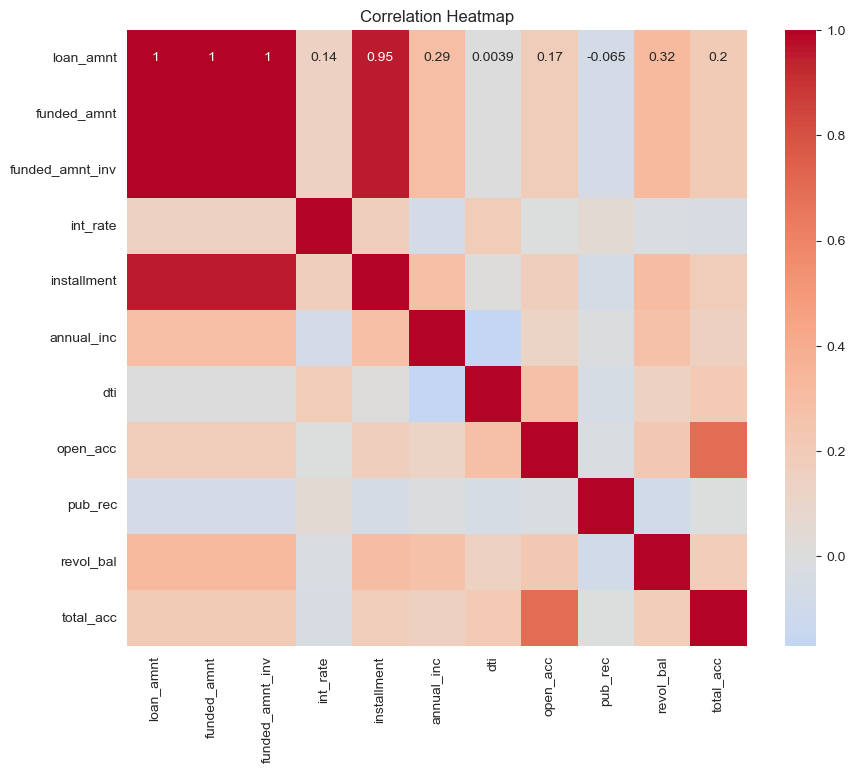

In [14]:
# Correlation heatmap
num_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']
corr = loans_df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

There are some features with correlation such as `open_acc` and `total_acc`. This info will be used later when linear assumptions must be met. 

In [15]:
'''
Javascript Error: Something went wrong with axis scaling

state_counts = loans_df['addr_state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
state_counts['state'] = state_counts['state'].str.upper()  # Ensure state codes are uppercase


# Create the choropleth map
fig = px.choropleth(state_counts,
                    locations='state',
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'count':'Number of Loans'},
                    title='Loan Distribution Across the US States')

fig.show()
'''

'\nJavascript Error: Something went wrong with axis scaling\n\nstate_counts = loans_df[\'addr_state\'].value_counts().reset_index()\nstate_counts.columns = [\'state\', \'count\']\nstate_counts[\'state\'] = state_counts[\'state\'].str.upper()  # Ensure state codes are uppercase\n\n\n# Create the choropleth map\nfig = px.choropleth(state_counts,\n                    locations=\'state\',\n                    locationmode="USA-states",\n                    color=\'count\',\n                    color_continuous_scale="Viridis",\n                    scope="usa",\n                    labels={\'count\':\'Number of Loans\'},\n                    title=\'Loan Distribution Across the US States\')\n\nfig.show()\n'